In [1]:
#import dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
%matplotlib inline

In [2]:
# Read the CSV file into a Pandas DataFrame
cvd_df=pd.read_csv("Framingham_clean.csv")

# Review the DataFrame
cvd_df.head()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [3]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex_Male                    3658 non-null   int64  
 1   Age                         3658 non-null   int64  
 2   Education                   3658 non-null   int64  
 3   Current_Smoker              3658 non-null   int64  
 4   Cigarettes_Per_Day          3658 non-null   int64  
 5   Blood_Pressure_Medications  3658 non-null   int64  
 6   Prevalent_Stroke            3658 non-null   int64  
 7   Prevalent_Hypertension      3658 non-null   int64  
 8   Diabetes                    3658 non-null   int64  
 9   Total_Cholesterol           3658 non-null   int64  
 10  Systolic_Blood_Pressure     3658 non-null   float64
 11  Diastolic_Blood_Pressure    3658 non-null   float64
 12  BMI                         3658 non-null   float64
 13  Heart_Rate                  3658 

In [4]:
cvd_df.isnull().sum()

Sex_Male                      0
Age                           0
Education                     0
Current_Smoker                0
Cigarettes_Per_Day            0
Blood_Pressure_Medications    0
Prevalent_Stroke              0
Prevalent_Hypertension        0
Diabetes                      0
Total_Cholesterol             0
Systolic_Blood_Pressure       0
Diastolic_Blood_Pressure      0
BMI                           0
Heart_Rate                    0
Glucose                       0
TenYearCHD                    0
dtype: int64

In [5]:
cvd_df.describe()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
cvd_df.shape

(3658, 16)

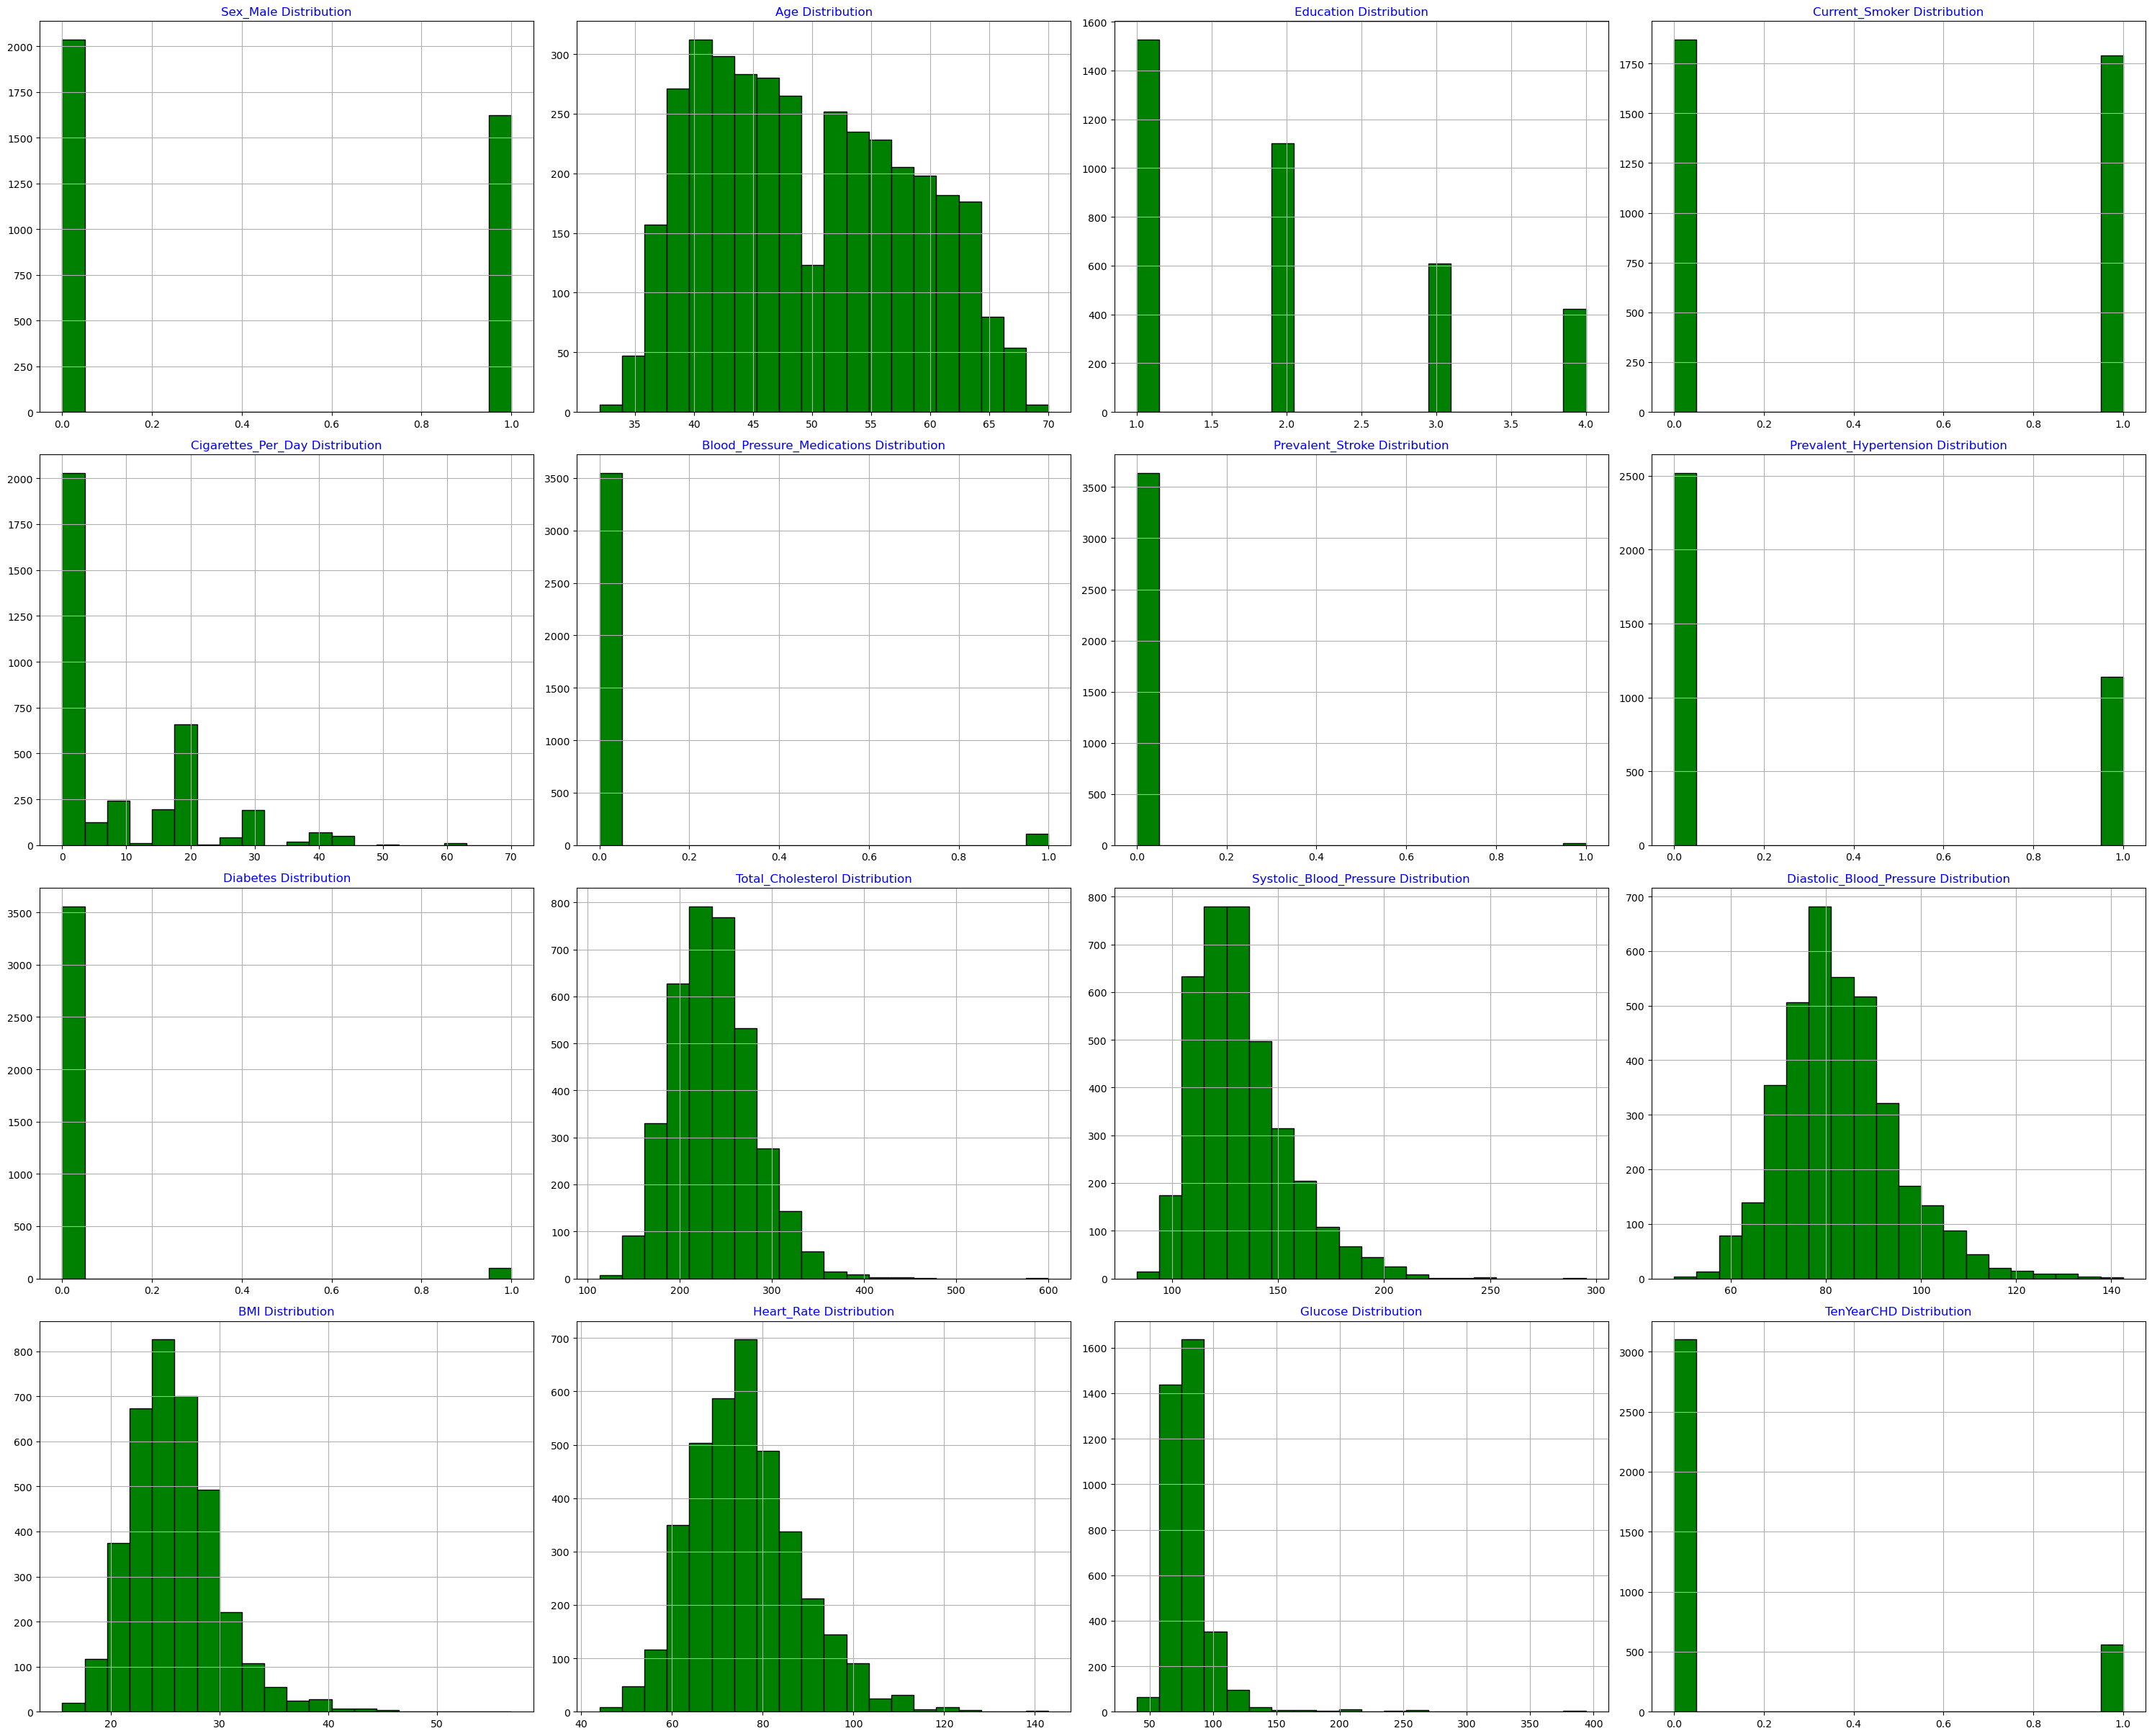

In [7]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green',edgecolor='black')
        ax.set_title(feature+" Distribution",color='blue')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(cvd_df,cvd_df.columns,5,4)

In [8]:
# Calculate the number of CHD cases (Yes/NO)
chd_total = cvd_df.TenYearCHD.value_counts()
chd_df = pd.DataFrame(chd_total)
chd_df.head()

,TenYearCHD
0,3101
1,557


In [9]:
# plot the bar chart for TenYearCHD using plotly with size 20 x 20

chd_bar = px.bar(chd_df, x='TenYearCHD', y='TenYearCHD', title='CHD Cases (Yes/No)', color = 'TenYearCHD')
chd_bar.update_layout(    width=800,     height=800  )
chd_bar.show()


In [10]:
cvd_df_pair = cvd_df[[ 'Total_Cholesterol',
       'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure', 'BMI',
       'Heart_Rate', 'Glucose', 'TenYearCHD']]

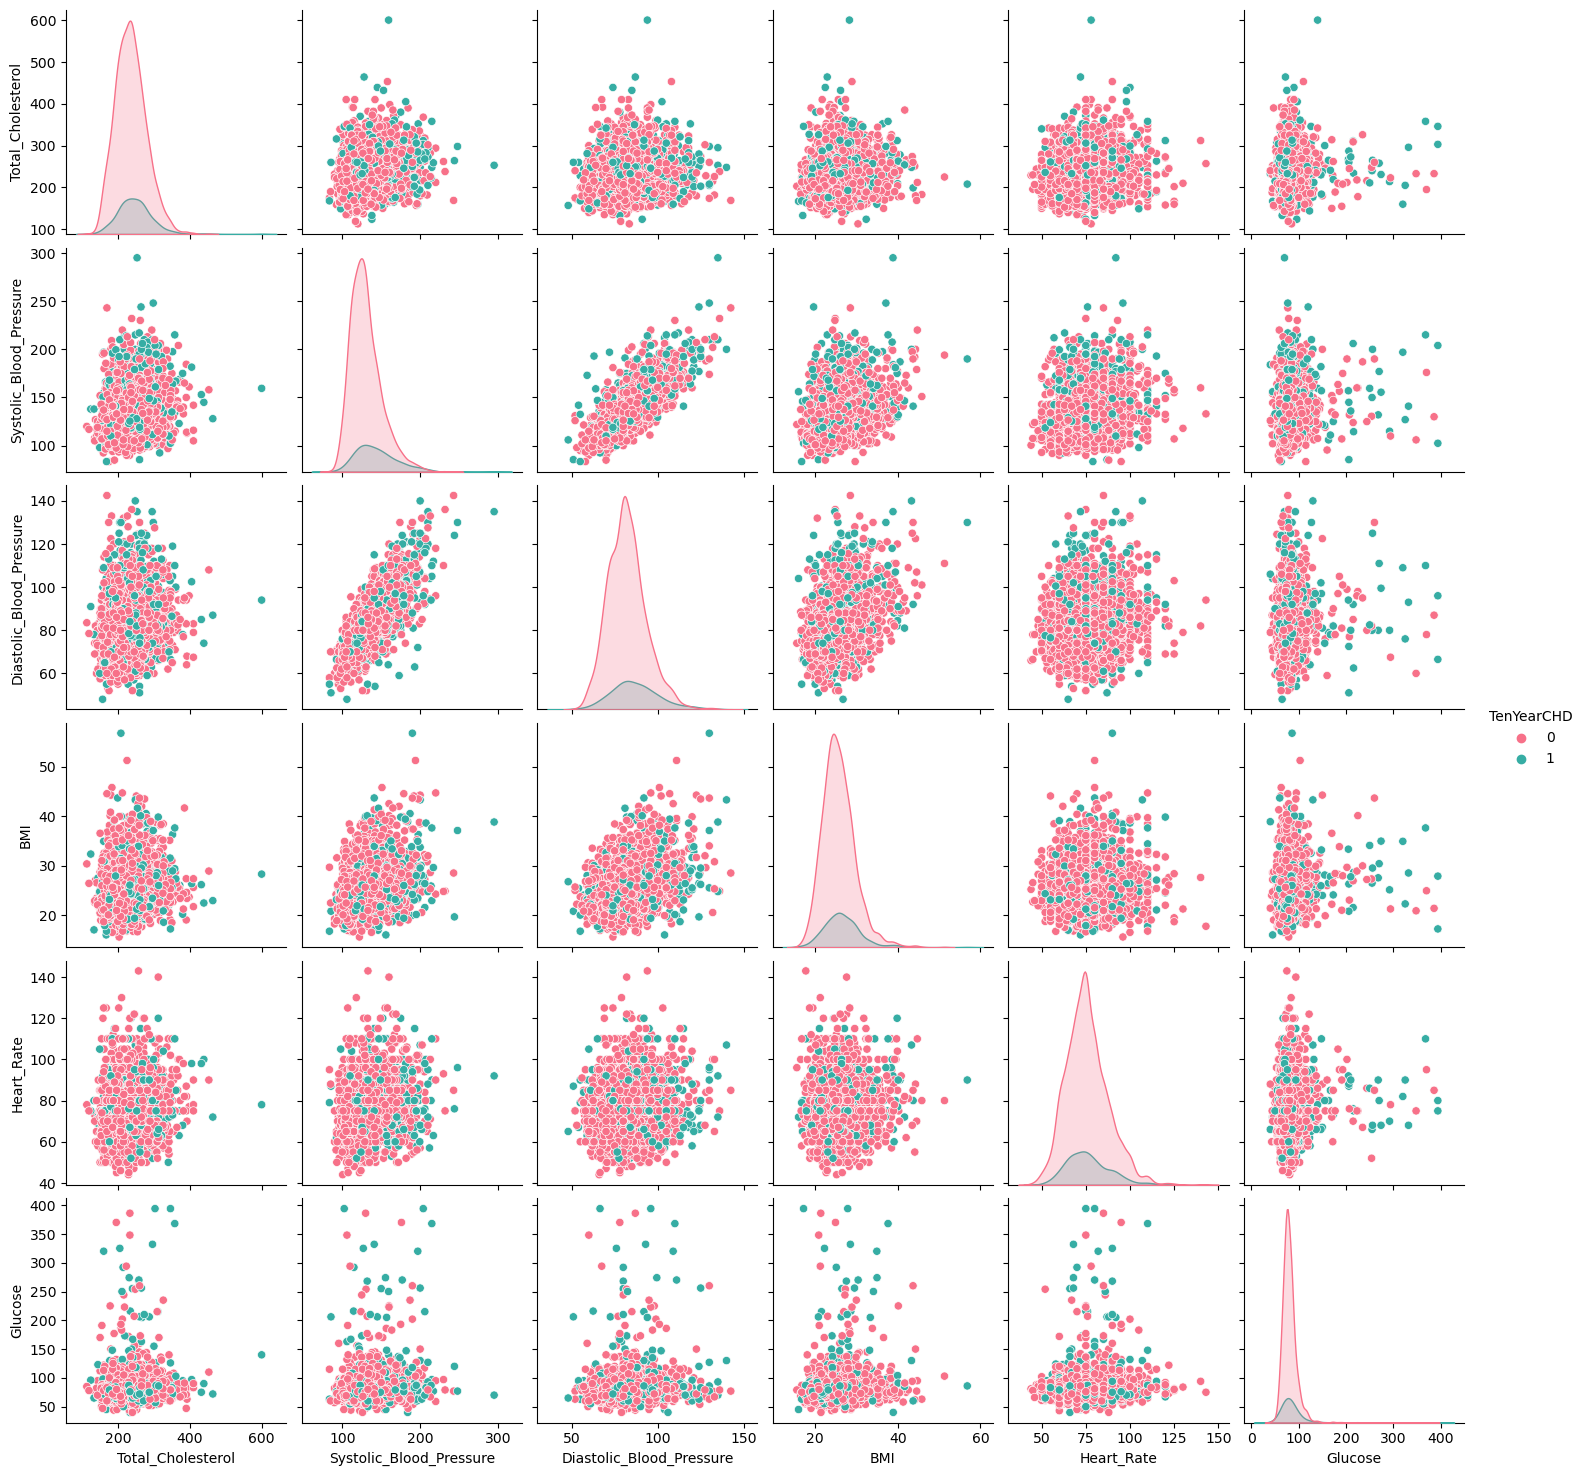

In [11]:
sn.pairplot(cvd_df_pair, hue='TenYearCHD', palette='husl', diag_kind='kde')

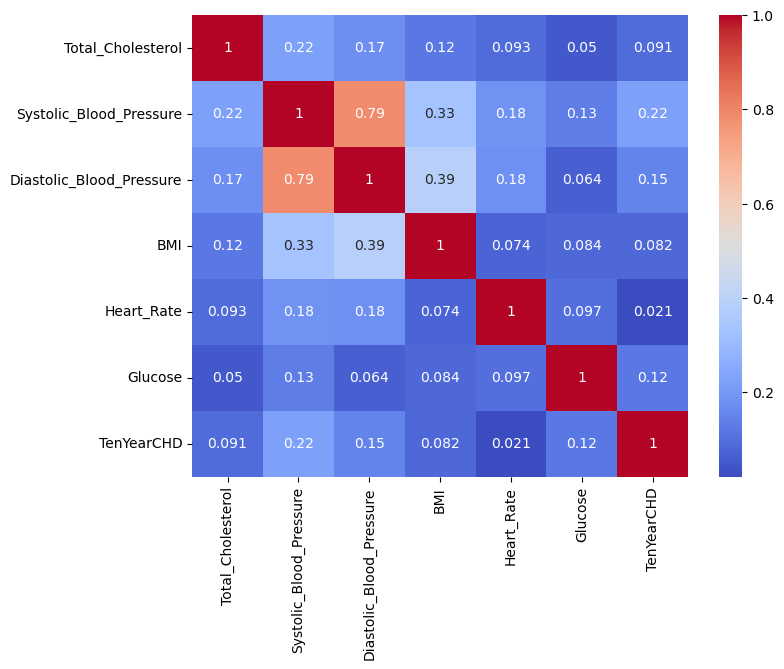

In [12]:
# Create the correlation matrix
corr_matrix = cvd_df_pair.corr()
# Set the figure size
plt.figure(figsize=(8, 6))
# Create the heatmap
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
# Define features set
X = cvd_df.copy()
X.drop("TenYearCHD", axis=1, inplace=True)
X.head()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85


In [14]:
 # Define target vector
y = cvd_df["TenYearCHD"].ravel()
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [15]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
 # Creating StandardScaler instance
scaler = StandardScaler()

In [17]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [18]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fitting the Random Forest Model

In [19]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [20]:
 # Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

###  Making Predictions Using the Random Forest Model

In [21]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

### Model Evaluation

In [22]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [23]:
 # Displaying results
print("RF Confusion Matrix")
display(cm_df)
print(f"RF Accuracy Score : {acc_score}")
print("RF Classification Report")
print(classification_report(y_test, predictions))

RF Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,769,6
Actual 1,136,4


RF Accuracy Score : 0.8448087431693989
RF Classification Report
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       775
           1       0.40      0.03      0.05       140

    accuracy                           0.84       915
   macro avg       0.62      0.51      0.48       915
weighted avg       0.78      0.84      0.78       915



In [24]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13339031982652996, 'Systolic_Blood_Pressure'),
 (0.12872809244092706, 'BMI'),
 (0.1281075071286606, 'Age'),
 (0.12223071749935507, 'Total_Cholesterol'),
 (0.12023574141818423, 'Glucose'),
 (0.11916232255516142, 'Diastolic_Blood_Pressure'),
 (0.09483738807752018, 'Heart_Rate'),
 (0.049212468693805106, 'Cigarettes_Per_Day'),
 (0.036432943412911326, 'Education'),
 (0.020878156908295694, 'Sex_Male'),
 (0.01772737060052536, 'Prevalent_Hypertension'),
 (0.012219808876814635, 'Current_Smoker'),
 (0.007709252451526337, 'Blood_Pressure_Medications'),
 (0.007057377916311747, 'Diabetes'),
 (0.002070532193471244, 'Prevalent_Stroke')]

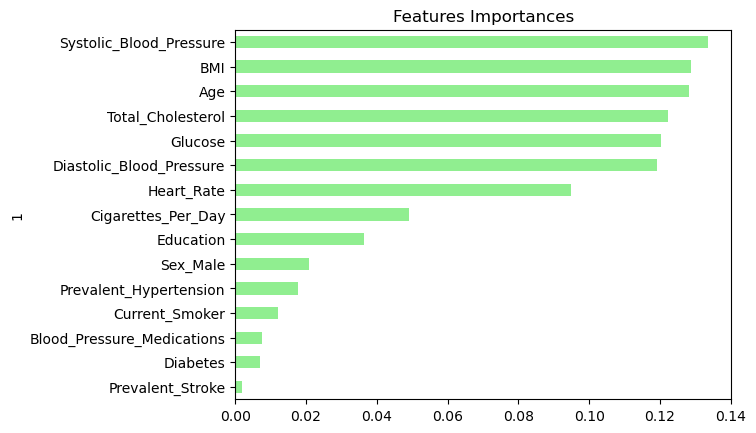

In [25]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
feature_importance = importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

feature_importance.get_figure().savefig('feature_importance_plot.png')

### Fitting the Decision Tree Model

In [26]:
# Creating the decision tree classifier instance
dt_model = tree.DecisionTreeClassifier()

In [27]:
# Fitting the model
dt_model = dt_model.fit(X_train_scaled, y_train)

### Making Predictions Using the Tree Model

In [28]:
# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)

### Model Evaluation

In [29]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [30]:
# Displaying results
print("DT Confusion Matrix")
display(cm_df)
print(f"DT Accuracy Score : {acc_score}")
print("DT Classification Report")
print(classification_report(y_test, predictions))

DT Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,649,126
Actual 1,100,40


DT Accuracy Score : 0.7530054644808744
DT Classification Report
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       775
           1       0.24      0.29      0.26       140

    accuracy                           0.75       915
   macro avg       0.55      0.56      0.56       915
weighted avg       0.77      0.75      0.76       915



In [31]:
import pydotplus
from IPython.display import Image
pydotplus.graphviz.ExecutablePath = "C:\Program Files\Graphviz\bin"

In [33]:
# Create DOT data

dot_data = tree.export_graphviz(dt_model, out_file=None,feature_names=X.columns,class_names=['0','1'],filled=True, rounded=True,special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# Save image to png format
graph.write_png("dtree.png")


True